<a href="https://colab.research.google.com/github/duyqu-chan/THY-Travel-Datathon/blob/development/TravelDatathon_preselection_offff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THY Travel Datathon Preselection Case Study

by Duygu Can, Meriç Pakkan, Neslihan Oflaz, Ahad Khaleghi Ardabili, Akın Erdem


Flying passengers can check-in through the web site, applications, kiosks and counters. In this case study content, the train data including the number of seven-month passenger check-in operations is provided. We want you to estimate the number of channels (column Operation_Count) in the csv file attached.

Mount drive to load the data:

In [125]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Expolaration

Upload the data by reading provided .csv files from Google Drive (change path if needed). There are 808696 samples in the training and 121921 instances in the test sets. Each has 23 features.

In [126]:
import pandas as pd
train_df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Train Data.csv")
result_df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Result File.csv")
print(train_df.shape)
print(result_df.shape)
train_df.head()

(808696, 23)
(121921, 23)


,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
0,20190326,20190326,KDT,KDT,?,032363,KS,?,QC,MISTER,M,IST,?,1,Y,1,0,0,0,1,0,0,1
1,20180321,20180321,KDT,KDT,?,03F960,KS,?,QC,MISTER,M,?,KDT,1,Y,1,0,0,0,1,0,0,1
2,20190322,20190322,KDT,KDT,?,03AA2P,KS,Y011161,QC,MISTER,M,?,?,1,Y,0,0,0,0,0,0,0,1
3,20180515,20180515,KDT,KDT,?,0353D0,MK,?,TS,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,2
4,20190420,20190420,KDT,KDT,?,03F902,KS,Y013437,QC,MISTER,M,?,?,1,Y,0,0,0,1,0,0,0,1


Check what data types we have:

In [127]:
train_df.dtypes

Departure_YMD_LMT             int64
Operation_YMD_LMT             int64
Departure_Airport            object
Operation_Airport            object
Terminal_Number              object
Terminal_Name                object
Operation_Initials           object
Operation_Sonic_Code         object
Operation_Channel            object
Passenger_Title              object
Passenger_Gender             object
Inbound_Departure_Airport    object
Outbound_Arrival_Airport     object
SWC_FLY                       int64
Cabin_Class                  object
SWC_FQTV_Member               int64
Passenger_Baggage_Count       int64
Passenger_Baggage_Weight      int64
SWC_Staff                     int64
SWC_CIP_Passenger             int64
SWC_VIP_Passenger             int64
SWC_Has_Infant                int64
Operation_Count               int64
dtype: object

In the *Departure_YMD_LMT* and the *Operation_YMD_LMT* colums, date of departure and date of check is stored so it is convenient to convert them to date time objects.

In [0]:
train_df['Departure_YMD_LMT'] = pd.to_datetime(train_df['Departure_YMD_LMT'], format='%Y%m%d')
train_df['Operation_YMD_LMT'] = pd.to_datetime(train_df['Operation_YMD_LMT'], format='%Y%m%d')
result_df['Departure_YMD_LMT'] = pd.to_datetime(result_df['Departure_YMD_LMT'], format='%Y%m%d')
result_df['Operation_YMD_LMT'] = pd.to_datetime(result_df['Operation_YMD_LMT'], format='%Y%m%d')

In [129]:
train_df.dtypes

Departure_YMD_LMT            datetime64[ns]
Operation_YMD_LMT            datetime64[ns]
Departure_Airport                    object
Operation_Airport                    object
Terminal_Number                      object
Terminal_Name                        object
Operation_Initials                   object
Operation_Sonic_Code                 object
Operation_Channel                    object
Passenger_Title                      object
Passenger_Gender                     object
Inbound_Departure_Airport            object
Outbound_Arrival_Airport             object
SWC_FLY                               int64
Cabin_Class                          object
SWC_FQTV_Member                       int64
Passenger_Baggage_Count               int64
Passenger_Baggage_Weight              int64
SWC_Staff                             int64
SWC_CIP_Passenger                     int64
SWC_VIP_Passenger                     int64
SWC_Has_Infant                        int64
Operation_Count                 

In [130]:
train_df.describe()

,SWC_FLY,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
count,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000
mean,0.939140,0.359679,0.655413,8.560313,0.029989,0.148156,0.008257,0.011681,1.534792
std,0.239073,0.479907,0.963677,13.667213,0.170557,0.355255,0.090489,0.107444,2.223746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,54.000000,970.000000,1.000000,1.000000,1.000000,1.000000,129.000000


Convert *object* datatype to category when needed.

In [0]:
for col_name in train_df.columns:
    if train_df[col_name].dtype.name == 'object':
        train_df[col_name] = train_df[col_name].astype('category')
        result_df[col_name] = result_df[col_name].astype('category')

In [132]:
train_df.dtypes

Departure_YMD_LMT            datetime64[ns]
Operation_YMD_LMT            datetime64[ns]
Departure_Airport                  category
Operation_Airport                  category
Terminal_Number                    category
Terminal_Name                      category
Operation_Initials                 category
Operation_Sonic_Code               category
Operation_Channel                  category
Passenger_Title                    category
Passenger_Gender                   category
Inbound_Departure_Airport          category
Outbound_Arrival_Airport           category
SWC_FLY                               int64
Cabin_Class                        category
SWC_FQTV_Member                       int64
Passenger_Baggage_Count               int64
Passenger_Baggage_Weight              int64
SWC_Staff                             int64
SWC_CIP_Passenger                     int64
SWC_VIP_Passenger                     int64
SWC_Has_Infant                        int64
Operation_Count                 

See the unique levels of the categorical columns. *Departure Airport* has only one value called "KDT". So, it is not informative and should be dropped.

In [133]:
for col_name in train_df.columns:
    if train_df[col_name].dtype.name == 'category':
        print(col_name, ":", train_df[col_name].unique())

Departure_Airport : [KDT]
Categories (1, object): [KDT]
Operation_Airport : [KDT, IST, ZKG, EST, GZT, ..., HRK, ODS, SOF, KNN, MNL]
Length: 143
Categories (143, object): [KDT, IST, ZKG, EST, ..., ODS, SOF, KNN, MNL]
Terminal_Number : [?, P1, P2]
Categories (3, object): [?, P1, P2]
Terminal_Name : [032363, 03F960, 03AA2P, 0353D0, 03F902, ..., 0B19C9, 03554A, 0302CA, 035316, 03550B]
Length: 2685
Categories (2685, object): [032363, 03F960, 03AA2P, 0353D0, ..., 03554A, 0302CA, 035316, 03550B]
Operation_Initials : [KS, MK, SC, EY, Q7, ..., NB, YK, RW, OA, JF]
Length: 273
Categories (272, object): [KS, MK, SC, EY, ..., YK, RW, OA, JF]
Operation_Sonic_Code : [?, Y011161, Y013437, Y027434, Y013171, ..., M025037, Y019509, Y036439, Y015916, Y039203]
Length: 1614
Categories (1614, object): [?, Y011161, Y013437, Y027434, ..., Y019509, Y036439, Y015916,
                            Y039203]
Operation_Channel : [QC, TS, JW, TW, TY, ..., CC, BD, IR, IA, QR]
Length: 13
Categories (13, object): [QC, TS,

Generate *Operation_Channel_Group* as defined in the pdf file.

In [134]:
dict = {"JW": 'Online',
        "TW": 'Online',
        "TS": 'Mobile',
        "JM": 'Mobile',
        "TY":"Counter",
        "QC":"Counter",
        "SC":"Kiosks",
        "IR":"Other",
        "?":"Other",
        "IA":"Other",
        "BD":"Other",
        "CC":"Other",
        "QR":"Other",
        "QP":"Other",
        "QA":"Other"
        }
train_df['Operation_Channel_Group'] = train_df['Operation_Channel'].map(dict)
train_df['Operation_Channel_Group'].unique()

array(['Counter', 'Mobile', 'Online', 'Kiosks', 'Other'], dtype=object)

Do the same for the test set.

In [135]:
result_df['Operation_Channel_Group'] = result_df['Operation_Channel'].map(dict)
result_df['Operation_Channel_Group'].unique()

array(['Mobile', 'Counter', 'Online', 'Kiosks', 'Other'], dtype=object)

Change data type to category

In [0]:
train_df["Operation_Channel_Group"] = train_df["Operation_Channel_Group"].astype('category')
result_df["Operation_Channel_Group"] = result_df["Operation_Channel_Group"].astype('category')

### Missing Value Handling

Column percentage of null values in the training and test sets are printed below. At first glance,there are only null values in the *Operation Initials* column, however some unknown values are encoded as "?" in the datasets.

In [137]:
(train_df.isnull().mean()*100).round(4)

Departure_YMD_LMT            0.0000
Operation_YMD_LMT            0.0000
Departure_Airport            0.0000
Operation_Airport            0.0000
Terminal_Number              0.0000
Terminal_Name                0.0000
Operation_Initials           0.0156
Operation_Sonic_Code         0.0000
Operation_Channel            0.0000
Passenger_Title              0.0000
Passenger_Gender             0.0000
Inbound_Departure_Airport    0.0000
Outbound_Arrival_Airport     0.0000
SWC_FLY                      0.0000
Cabin_Class                  0.0000
SWC_FQTV_Member              0.0000
Passenger_Baggage_Count      0.0000
Passenger_Baggage_Weight     0.0000
SWC_Staff                    0.0000
SWC_CIP_Passenger            0.0000
SWC_VIP_Passenger            0.0000
SWC_Has_Infant               0.0000
Operation_Count              0.0000
Operation_Channel_Group      0.0000
dtype: float64

In [138]:
(result_df.isnull().mean()*100).round(4)

Departure_YMD_LMT            0.0000
Operation_YMD_LMT            0.0000
Departure_Airport            0.0000
Operation_Airport            0.0000
Terminal_Number              0.0000
Terminal_Name                0.0000
Operation_Initials           0.0033
Operation_Sonic_Code         0.0000
Operation_Channel            0.0000
Passenger_Title              0.0000
Passenger_Gender             0.0000
Inbound_Departure_Airport    0.0000
Outbound_Arrival_Airport     0.0000
SWC_FLY                      0.0000
Cabin_Class                  0.0000
SWC_FQTV_Member              0.0000
Passenger_Baggage_Count      0.0000
Passenger_Baggage_Weight     0.0000
SWC_Staff                    0.0000
SWC_CIP_Passenger            0.0000
SWC_VIP_Passenger            0.0000
SWC_Has_Infant               0.0000
Operation_Count              0.0000
Operation_Channel_Group      0.0000
dtype: float64

Column based "?" occurance percentages in the training set:

In [139]:
import numpy as np
def unknown_perc(df):
  print("Column Name\t Percentage")
  for col_name in df.columns:
        if df[col_name].dtype.name == 'category' and (df[col_name] == "?").any():
          count = df[col_name].value_counts(dropna=False)['?']
          percentage = (count/len(df)*100).round(3)
          print(col_name,"\t", percentage)
  return
        
unknown_perc(train_df)

Column Name	 Percentage
Terminal_Number 	 90.618
Operation_Sonic_Code 	 78.927
Operation_Channel 	 2.112
Passenger_Title 	 2.331
Passenger_Gender 	 3.902
Inbound_Departure_Airport 	 91.338
Outbound_Arrival_Airport 	 64.422
Cabin_Class 	 3.409


Column based "?" occurance percentages in the test set:

In [140]:
unknown_perc(result_df)

Column Name	 Percentage
Terminal_Number 	 91.39
Operation_Sonic_Code 	 54.39
Operation_Channel 	 0.871
Passenger_Title 	 2.762
Passenger_Gender 	 0.076
Inbound_Departure_Airport 	 94.52
Outbound_Arrival_Airport 	 65.008


#### Generating Flags


Let's transform Operation_Sonic_Code to Operation_Sonic_Code_Flag  in order to see if these variables are null or not. We choose to do this since there are so many different classes for these variables.



---

Depreciated: Terminal_Name to Terminal_Name_Flag


---



In [0]:
train_df['Operation_Sonic_Code_Flag'] = np.where(train_df['Operation_Sonic_Code']=='?', '0', '1')
train_df['Operation_Sonic_Code_Flag'] = train_df['Operation_Sonic_Code_Flag'].astype(int)
#train_df['Terminal_Number_Flag'] = np.where(train_df['Terminal_Number']=='?', '0', '1')
#train_df['Terminal_Number_Flag'] = train_df['Terminal_Number_Flag'].astype(int)
result_df['Operation_Sonic_Code_Flag'] = np.where(result_df['Operation_Sonic_Code']=='?', '0', '1')
result_df['Operation_Sonic_Code_Flag'] = result_df['Operation_Sonic_Code_Flag'].astype(int)
#result_df['Terminal_Number_Flag'] = np.where(result_df['Terminal_Number']=='?', '0', '1')
#result_df['Terminal_Number_Flag'] = result_df['Terminal_Number_Flag'].astype(int)

Convert "?" to NA when needed. Apart from *Inbound_Departure_Airport* and *Outbound_Arrival_Airport*, "?" is printed for unknown values (missing). For those specific columns "?" means that there is no inbound or outbound flight (direct flight), so they are encoded as a seperate class called *Unknown*.

In [0]:
import numpy as np
#train_df['Terminal_Number'] = train_df['Terminal_Number'].replace('?', np.nan)
#train_df['Operation_Channel'] = train_df['Operation_Channel'].replace('?', np.nan)
train_df['Passenger_Title'] = train_df['Passenger_Title'].replace('?', np.nan)
train_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace('?', np.nan)
train_df['Inbound_Departure_Airport'] = train_df['Inbound_Departure_Airport'].replace('?', "Unknown")
train_df['Outbound_Arrival_Airport'] = train_df['Outbound_Arrival_Airport'].replace('?', "Unknown")
train_df['Cabin_Class'] = train_df['Cabin_Class'].replace('?', np.nan)
train_df["Operation_Initials"] = train_df["Operation_Initials"].replace("?",np.nan)
train_df["Operation_Sonic_Code"] = train_df["Operation_Sonic_Code"].replace("?",np.nan)

#result_df['Terminal_Number'] = result_df['Terminal_Number'].replace('?', np.nan)
#result_df['Operation_Channel'] = result_df['Operation_Channel'].replace('?', np.nan)
result_df['Passenger_Title'] = result_df['Passenger_Title'].replace('?', np.nan)
result_df['Passenger_Gender'] = result_df['Passenger_Gender'].replace('?', np.nan)
result_df['Inbound_Departure_Airport'] = result_df['Inbound_Departure_Airport'].replace('?', "Unknown")
result_df['Outbound_Arrival_Airport'] = result_df['Outbound_Arrival_Airport'].replace('?', "Unknown")
result_df['Cabin_Class'] = result_df['Cabin_Class'].replace('?', np.nan)
result_df["Operation_Initials"] = train_df["Operation_Initials"].replace("?",np.nan)
result_df["Operation_Sonic_Code"] = result_df["Operation_Sonic_Code"].replace("?",np.nan)

Now, the new missing value percentages for the training set becomes:

In [143]:
(train_df.isnull().mean()*100).round(4)

Departure_YMD_LMT             0.0000
Operation_YMD_LMT             0.0000
Departure_Airport             0.0000
Operation_Airport             0.0000
Terminal_Number               0.0000
Terminal_Name                 0.0000
Operation_Initials            0.0156
Operation_Sonic_Code         78.9266
Operation_Channel             0.0000
Passenger_Title               2.3307
Passenger_Gender              3.9025
Inbound_Departure_Airport     0.0000
Outbound_Arrival_Airport      0.0000
SWC_FLY                       0.0000
Cabin_Class                   3.4093
SWC_FQTV_Member               0.0000
Passenger_Baggage_Count       0.0000
Passenger_Baggage_Weight      0.0000
SWC_Staff                     0.0000
SWC_CIP_Passenger             0.0000
SWC_VIP_Passenger             0.0000
SWC_Has_Infant                0.0000
Operation_Count               0.0000
Operation_Channel_Group       0.0000
Operation_Sonic_Code_Flag     0.0000
dtype: float64

and for the test set the result is:

In [144]:
(result_df.isnull().mean()*100).round(4)

Departure_YMD_LMT             0.0000
Operation_YMD_LMT             0.0000
Departure_Airport             0.0000
Operation_Airport             0.0000
Terminal_Number               0.0000
Terminal_Name                 0.0000
Operation_Initials            0.0180
Operation_Sonic_Code         54.3901
Operation_Channel             0.0000
Passenger_Title               2.7616
Passenger_Gender              0.0763
Inbound_Departure_Airport     0.0000
Outbound_Arrival_Airport      0.0000
SWC_FLY                       0.0000
Cabin_Class                   0.0000
SWC_FQTV_Member               0.0000
Passenger_Baggage_Count       0.0000
Passenger_Baggage_Weight      0.0000
SWC_Staff                     0.0000
SWC_CIP_Passenger             0.0000
SWC_VIP_Passenger             0.0000
SWC_Has_Infant                0.0000
Operation_Count               0.0000
Operation_Channel_Group       0.0000
Operation_Sonic_Code_Flag     0.0000
dtype: float64

### Dropping Uninformative Features

Notice that *Operation Sonic Code*  has a missing value ratio of 79% and for *Terminal Number* column this ratio is even higher (>90%). With a ratio this high, we cannot impute missing values correctly. These columns should be dropped, along with the *Departure_Airport* column. 



---

Later we decided to keep *Terminal Number* since it shows high correlation whether the passenger flies or not (SWC_FLY). We thought that even this column composed of values mostly unknown, it can be stil informative.


---




In [0]:
#train_df2 = train_df.copy()
#result_df2 = result_df.copy()
train_df = train_df.drop(columns = [ "Departure_Airport", "Operation_Sonic_Code"]) #"Terminal_Number", 
result_df = result_df.drop(columns = ["Departure_Airport", "Operation_Sonic_Code"]) #"Terminal_Number", 

#### Imputing Passenger Gender

First, we used *Passenger Title* to impute missing values in the gender column. We replaced unknown genders whose titles are *MISTER*, *MISS* and *MISSES* with male and females, respectively. Later, we decided *Operation Channel Group* based imputation for the rest. So we grouped the dataframe by this column and found most frequent observations for the *Passenger Gender* column.

In [146]:
# Replace missing values whose titles are MISTER with M
train_df.loc[(train_df.Passenger_Gender.isna() ) & (train_df.Passenger_Title=='MISTER'),"Passenger_Gender"] = "M"
result_df.loc[(result_df.Passenger_Gender.isna() ) & (result_df.Passenger_Title=='MISTER'),"Passenger_Gender"] = "M"

# Replace missing values whose titles are MISS or MISSES with F
train_df.loc[(train_df.Passenger_Gender.isna() ) & ((train_df.Passenger_Title=='MISS') | (train_df.Passenger_Title=='MISSES')) ,"Passenger_Gender"] = "F"
result_df.loc[(result_df.Passenger_Gender.isna() ) & ((result_df.Passenger_Title=='MISS') | (result_df.Passenger_Title=='MISSES')) ,"Passenger_Gender"] = "F"

sum(train_df["Passenger_Gender"].isnull())

981

There are 981 missing values left in the gender column. We checked channel group based gender distribution and found that the most frequent gender is male for every channel

In [147]:
train_df.groupby("Operation_Channel_Group")['Passenger_Gender'].apply(lambda x: x.value_counts().index[0])#.reset_index()

Operation_Channel_Group
Counter    M
Kiosks     M
Mobile     M
Online     M
Other      M
Name: Passenger_Gender, dtype: object

In [148]:
train_df.groupby("Operation_Channel_Group")['Passenger_Gender'].apply(lambda x: x.value_counts())

Operation_Channel_Group       
Counter                  M        237238
                         F        140313
                         C         11334
                         F/INF      1984
                         M/INF      1187
                         C/INF         6
                         ?             0
Kiosks                   M         27454
                         F         13975
                         C          1143
                         F/INF       139
                         M/INF        99
                         C/INF         0
                         ?             0
Mobile                   M         91209
                         F         62979
                         C          4621
                         F/INF       548
                         M/INF       380
                         C/INF         0
                         ?             0
Online                   M        104584
                         F         82430
                         C

In [149]:
result_df.groupby("Operation_Channel_Group")['Passenger_Gender'].apply(lambda x: x.value_counts())

Operation_Channel_Group   
Counter                  M    32131
                         F    23568
                         C     3107
                         ?        0
Kiosks                   M     4364
                         F     2458
                         C      275
                         ?        0
Mobile                   M    13059
                         F    10883
                         C     1129
                         ?        0
Online                   M    14682
                         F    13371
                         C     1445
                         ?        0
Other                    M      679
                         F      585
                         C       92
                         ?        0
Name: Passenger_Gender, dtype: int64

Since most common gender for all channel groups is male, we imputed missing gender values with "M".

In [150]:
train_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace(np.nan, "M")
train_df['Passenger_Gender'].unique()

[M, F, F/INF, M/INF, C, C/INF]
Categories (6, object): [M, F, F/INF, M/INF, C, C/INF]

In [151]:
result_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace(np.nan, "M")
result_df['Passenger_Gender'].unique()

[M, F, F/INF, M/INF, C, C/INF]
Categories (6, object): [M, F, F/INF, M/INF, C, C/INF]

#### Imputing Passenger Title

Again, Operation Channel Group based imputation is employed. "MISTER" is most common tittle so we employed all the missin values with that.

In [152]:
train_df.groupby("Operation_Channel_Group")['Passenger_Title'].apply(lambda x: x.value_counts())

Operation_Channel_Group           
Counter                  MISTER       230324
                         MISS         107506
                         MISSES        42584
                         DOCTOR          157
                         PROFFESOR        10
                         ?                 0
Kiosks                   MISTER        26821
                         MISS          10749
                         MISSES         3910
                         DOCTOR            9
                         PROFFESOR         1
                         ?                 0
Mobile                   MISTER        92083
                         MISS          48132
                         MISSES        17537
                         DOCTOR           62
                         PROFFESOR         3
                         ?                 0
Online                   MISTER       105085
                         MISS          63692
                         MISSES        22288
                    

In [153]:
result_df.groupby("Operation_Channel_Group")['Passenger_Title'].apply(lambda x: x.value_counts())

Operation_Channel_Group           
Counter                  MISTER       31512
                         MISS         20004
                         MISSES        5053
                         DOCTOR          22
                         PROFFESOR        6
                         ?                0
Kiosks                   MISTER        4260
                         MISS          2087
                         MISSES         502
                         DOCTOR           2
                         PROFFESOR        0
                         ?                0
Mobile                   MISTER       13275
                         MISS          9310
                         MISSES        2116
                         DOCTOR           6
                         PROFFESOR        0
                         ?                0
Online                   MISTER       14972
                         MISS         11525
                         MISSES        2535
                         DOCTOR          

In [154]:
train_df['Passenger_Title'] = train_df['Passenger_Title'].replace(np.nan, "MISTER")
train_df['Passenger_Title'].unique()

[MISTER, MISS, MISSES, DOCTOR, PROFFESOR]
Categories (5, object): [MISTER, MISS, MISSES, DOCTOR, PROFFESOR]

In [155]:
result_df['Passenger_Title'] = result_df['Passenger_Title'].replace(np.nan, "MISTER")
result_df['Passenger_Title'].unique()

[MISS, MISTER, MISSES, DOCTOR, PROFFESOR]
Categories (5, object): [MISS, MISTER, MISSES, DOCTOR, PROFFESOR]

#### Imputing Cabin Class
Most common class is economy class for all channel groups so we imputed missing values with it.

In [156]:
train_df.groupby("Operation_Channel_Group")['Cabin_Class'].apply(lambda x: x.value_counts())

Operation_Channel_Group   
Counter                  Y    359878
                         C     24154
                         ?         0
Kiosks                   Y     40963
                         C       784
                         ?         0
Mobile                   Y    141832
                         C     10066
                         ?         0
Online                   Y    177436
                         C      8563
                         ?         0
Other                    Y     15258
                         C      2191
                         ?         0
Name: Cabin_Class, dtype: int64

In [157]:
train_df["Cabin_Class"].unique()

[Y, NaN, C]
Categories (2, object): [Y, C]

In [158]:
result_df.groupby("Operation_Channel_Group")['Cabin_Class'].apply(lambda x: x.value_counts())

Operation_Channel_Group   
Counter                  Y    55315
                         C     3506
Kiosks                   Y     6964
                         C      136
Mobile                   Y    23169
                         C     1912
Online                   Y    28342
                         C     1165
Other                    Y     1029
                         C      383
Name: Cabin_Class, dtype: int64

In [159]:
train_df['Cabin_Class'] = train_df['Cabin_Class'].replace(np.nan, "Y")
train_df['Cabin_Class'].unique()

[Y, C]
Categories (2, object): [Y, C]

In [160]:
result_df['Cabin_Class'] = result_df['Cabin_Class'].replace(np.nan, "Y")
result_df['Cabin_Class'].unique()

[Y, C]
Categories (2, object): [Y, C]

#### Imputing Operation Initials

The most frequent *Operation Initials* observed in different channel groups for the training and the test set are given below.

In [161]:
train_df.groupby("Operation_Channel_Group")['Operation_Initials'].apply(lambda x: x.value_counts().index[0])

Operation_Channel_Group
Counter    KS
Kiosks     SC
Mobile     MK
Online     MK
Other      MK
Name: Operation_Initials, dtype: object

In [162]:
result_df.groupby("Operation_Channel_Group")['Operation_Initials'].apply(lambda x: x.value_counts().index[0])

Operation_Channel_Group
Counter    KS
Kiosks     KS
Mobile     KS
Online     KS
Other      KS
Name: Operation_Initials, dtype: object

The most frequent initials observed in each channel group is "KS" for test set so we replaced NA values with it.

In [163]:
result_df['Operation_Initials'] = result_df['Operation_Initials'].replace(np.nan, "KS")
result_df['Operation_Initials'].unique()

[KS, MK, SC, EY, Q7, ..., SA, O3, VO, ZF, AX]
Length: 123
Categories (123, object): [KS, MK, SC, EY, ..., O3, VO, ZF, AX]

However, we need to impute missing values differently for different channels for the training set.

In [0]:
train_df.loc[(train_df.Operation_Channel_Group == "Counter") & (train_df.Operation_Initials.isna()),"Operation_Initials"] = "KS"
train_df.loc[(train_df.Operation_Channel_Group == "Kiosks") & (train_df.Operation_Initials.isna()),"Operation_Initials"] = "SC"
train_df.loc[(train_df.Operation_Channel_Group != "Kiosks") & (train_df.Operation_Channel_Group != "Counter") & (train_df.Operation_Initials.isna()),"Operation_Initials"] = "MK"

## Feature Generation

### Early Check-in & Early Check-in Status

We generate another variable to see if people checked in on-time or not. The date is given as days, so how many days there are between the flight and the check-in is added as a variable.

In [165]:
train_df['Early_Check_In'] = (train_df.Departure_YMD_LMT - train_df.Operation_YMD_LMT)
train_df['Early_Check_In'] = (train_df['Early_Check_In']/86400000000000).astype(int)
train_df['Early_Check_In'].unique()

array([   0,    1,    2, 7033,    3,   -1, 7391, 7366, 7367, 7010, 7072,
       7037, 7092, 7105, 7057, 7418, 7426, 7388, 7440, 7008, 7443, 7405,
       7002, 7016, 7415, 7384, 7100, 7455, 7386, 7067, 7378, 7101, 7398,
       7000, 7036, 7431, 7396, 7012, 7454, 7441, 7098, 7371, 7420, 7089,
       7438, 7390, 7028, 7108, 7372, 7047, 7422, 7379, 7096, 7409, 7404,
       7374, 7004, 7013, 7410, 7020, 7088, 7083, 7056, 7102, 7024, 7370,
       7095, 7110, 7051, 7049, 7109, 7421, 7414, 7063, 7452, 7376, 7424,
       7034, 7039, 7429, 6999, 7394, 7040, 7041, 7077, 7053, 7411, 7086,
       7419, 7406, 7369, 7006, 7045, 7385, 7023, 7019, 7069, 7081, 7044,
       7423, 7011, 7437, 7058, 7005, 7087, 7115, 7070, 7027, 7368, 7381,
       7425, 7074, 7389, 7025, 7054, 7076, 7380, 7106, 7432, 7449, 7387,
       7445, 7022, 7413, 7382, 7401, 7062, 7075, 7048, 7393, 7090, 7392,
       7094, 7377, 7364, 7065, 7375, 7453, 7107, 7018, 7064, 7383, 7055,
       7046, 7038, 7031, 7365, 7042, 7442, 7026, 74

There are some peculiar cases where check-in made 7000 days before in 1999!

In [166]:
train_df[train_df['Early_Check_In']>100].sort_values('Operation_YMD_LMT')

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In
469,2018-04-04,1999-01-01,TJV,?,03F9C5,KS,QC,MISTER,M,EST,Unknown,1,Y,1,0,0,0,0,0,0,2,Counter,0,7033
555391,2019-04-21,1999-01-01,JED,?,096D33,AJ,TY,MISSES,F,JED,Unknown,1,Y,0,1,10,0,0,0,0,1,Counter,0,7415
553128,2019-04-16,1999-01-01,JED,?,095C12,AZ,TY,MISTER,M,JED,Unknown,1,Y,1,3,35,0,1,0,0,1,Counter,0,7410
551608,2019-03-17,1999-01-01,ISL,?,03293A,KS,QC,MISTER,M,Unknown,Unknown,1,Y,0,2,28,0,0,0,0,1,Counter,1,7380
551287,2019-03-14,1999-01-01,ISL,?,035443,MK,TS,MISTER,M,Unknown,Unknown,1,Y,0,0,0,0,0,0,0,1,Mobile,0,7377
550406,2018-03-29,1999-01-01,TJV,?,0B3F66,KS,TY,MISS,F,Unknown,Unknown,1,Y,0,1,13,1,0,0,0,1,Counter,0,7027
549936,2019-05-31,1999-01-01,KWI,?,03237P,LK,QC,MISS,F,KWI,Unknown,1,Y,0,0,0,0,0,0,0,2,Counter,0,7455
547407,2018-06-04,1999-01-01,VKO,?,03543P,MK,TS,MISTER,M,EST,Unknown,1,Y,1,1,8,0,0,0,0,1,Mobile,0,7094
543253,2019-04-10,1999-01-01,TJV,P2,03F901,KS,QC,MISTER,M,Unknown,NKV,1,Y,0,1,7,0,0,0,0,1,Counter,1,7404
541138,2018-03-12,1999-01-01,TTS,P1,03294D,NU,QC,MISTER,M,IST,KSY,0,Y,0,0,0,0,0,0,0,1,Counter,0,7010


We replaced the check-in day as early, on-time and peculiar.

In [0]:
train_df.loc[train_df.Early_Check_In > 100, 'Early_Check_In_Status'] = 'Peculiar'
train_df.loc[(train_df.Early_Check_In == 0) | (train_df.Early_Check_In == -1), 'Early_Check_In_Status'] = 'On-time'
train_df.loc[(train_df.Early_Check_In == 1) | (train_df.Early_Check_In == 2) | (train_df.Early_Check_In == 3), 'Early_Check_In_Status'] = 'Early'

Do the same for the result set.

In [0]:
result_df['Early_Check_In'] = (result_df.Departure_YMD_LMT - result_df.Operation_YMD_LMT)
result_df['Early_Check_In'] = (result_df['Early_Check_In']/86400000000000).astype(int)
result_df.loc[result_df.Early_Check_In > 100, 'Early_Check_In_Status'] = 'Peculiar'
result_df.loc[(result_df.Early_Check_In == 0) | (result_df.Early_Check_In == -1), 'Early_Check_In_Status'] = 'On-time'
result_df.loc[(result_df.Early_Check_In == 1) | (result_df.Early_Check_In == 2) | (result_df.Early_Check_In == 3), 'Early_Check_In_Status'] = 'Early'

The flights with no inbound and no outbound terminal are direct flights so we generated a new colum to label those flights

In [0]:
train_df['Direct_Flight'] = np.where((train_df.Inbound_Departure_Airport == 'Unknown') & (train_df.Outbound_Arrival_Airport == 'Unknown'), 1, 0)
result_df['Direct_Flight'] = np.where((result_df.Inbound_Departure_Airport == 'Unknown') & (result_df.Outbound_Arrival_Airport == 'Unknown'), 1, 0)

### Check-in Inbound & Check-in Outbound

The number of different values in Operation_Airport is very high. We think that, whether the Operation_Airport is the same airport with the Inbound_Departure_Airport or the Outbound_Arrival_Airport, is an important feature. So Checkin_Outbound and Operation_Outbound variables indicate if the check-in operation is done at either the Inbound_Departure_Airport or the Outbound_Arrival_Airport. 



In [0]:
train_df.loc[(train_df.Operation_Airport == train_df.Inbound_Departure_Airport), 'Checkin_Inbound'] = 1
train_df['Checkin_Inbound'] = train_df['Checkin_Inbound'].replace(np.nan, 0)

result_df.loc[(result_df.Operation_Airport == result_df.Inbound_Departure_Airport), 'Checkin_Inbound'] = 1
result_df['Checkin_Inbound'] = result_df['Checkin_Inbound'].replace(np.nan, 0)



train_df.loc[(train_df.Operation_Airport == train_df.Outbound_Arrival_Airport), 'Checkin_Outbound'] = 1
train_df['Checkin_Outbound'] = train_df['Checkin_Outbound'].replace(np.nan, 0)

result_df.loc[(result_df.Operation_Airport == result_df.Outbound_Arrival_Airport), 'Checkin_Outbound'] = 1
result_df['Checkin_Outbound'] = result_df['Checkin_Outbound'].replace(np.nan, 0)


### Operation Airport Reduced
We now reduce the number of different values in Operation_Airport variable for the most frequent ones since there is a huge drop after *EST* airport.

In [171]:
train_df.groupby('Operation_Airport').count().sort_values('Operation_Initials', ascending=False).head(10)


,Departure_YMD_LMT,Operation_YMD_LMT,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound
Operation_Airport,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDT,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903,785903
IST,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621
SKW,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647
EST,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697
TZX,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
GZT,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
ERZ,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
KYT,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
TLV,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


The same most frequent 4 airports (KDT, IST, SKW, EST) found in the test set.

In [172]:
result_df.groupby('Operation_Airport').count().sort_values('Operation_Initials', ascending=False).head(10)


,Departure_YMD_LMT,Operation_YMD_LMT,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound
Operation_Airport,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDT,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
IST,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
SKW,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565
EST,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
ENN,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
MED,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
TLV,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
KWI,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
HKM,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31


The occurences of most frequent values are far different for the first 4 values. They are the same airport for both train and test data. So, any airport other than these 4 is replaced with "OTHERS".

In [0]:
train_df['Operation_Airport_Reduced'] = np.where((train_df.Operation_Airport == 'KDT') | (train_df.Operation_Airport == 'IST') | (train_df.Operation_Airport == 'SKW') | (train_df.Operation_Airport == 'EST'), train_df.Operation_Airport, 'OTHERS')
result_df['Operation_Airport_Reduced'] = np.where((result_df.Operation_Airport == 'KDT') | (result_df.Operation_Airport == 'IST') | (result_df.Operation_Airport == 'SKW') | (result_df.Operation_Airport == 'EST'), result_df.Operation_Airport, 'OTHERS')

### Operation Initials Reduced

We followed the same grouping scheme for the Operation_Initials column. There is a huge drop after LK company in terms of count.

In [174]:
train_df.groupby('Operation_Initials').count().sort_values('Operation_Airport', ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced
Operation_Initials,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KS,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596
MK,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434
SC,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707
Q7,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559
EY,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780
LK,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239
YM,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481
CB,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
FY,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317


In [175]:
result_df.groupby('Operation_Initials').count().sort_values('Operation_Airport', ascending=False).head(10)


,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced
Operation_Initials,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KS,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017,59017
MK,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227,54227
SC,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449
Q7,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148
EY,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
LK,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
YM,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
FY,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
BO,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50


The 6 most frequent values differ significantly from the others. The same pattern in the training set is shared with the test set.  We replace the others with "OTHERS" and kept the most frequent ones.

In [0]:
train_df['Operation_Initials_Reduced'] = np.where((train_df.Operation_Initials == 'KS') | (train_df.Operation_Initials == 'MK') | (train_df.Operation_Initials == 'SC') | (train_df.Operation_Initials == 'Q7') | (train_df.Operation_Initials == 'EY') | (train_df.Operation_Initials == 'LK'), train_df.Operation_Initials, 'OTHERS')
result_df['Operation_Initials_Reduced'] = np.where((result_df.Operation_Initials == 'KS') | (result_df.Operation_Initials == 'MK') | (result_df.Operation_Initials == 'SC') | (result_df.Operation_Initials == 'Q7') | (result_df.Operation_Initials == 'EY') | (result_df.Operation_Initials == 'LK'), result_df.Operation_Initials, 'OTHERS')


In [177]:
train_df.groupby('Operation_Initials_Reduced').count().sort_values('Operation_Airport', ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced
Operation_Initials_Reduced,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KS,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596,390596
MK,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434,360434
SC,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707,42707
Q7,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559
OTHERS,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381,4381
EY,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780
LK,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239


### Inbound_Departure_Airport_Reduced

The most common *Inbound Departure Airports* are unknowns (those with no inbound flight), IST, SKW and EST for the test and the training set both. So we kept those and grouped the others as OTHERS. 

In [178]:
train_df.groupby('Inbound_Departure_Airport').count().sort_values('Operation_Airport', ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced,Operation_Initials_Reduced
Inbound_Departure_Airport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Unknown,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646,738646
IST,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814,33814
SKW,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757,21757
EST,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130,14130
ISL,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
JED,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
MUN,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
KWI,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
ENN,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [179]:
result_df.groupby('Inbound_Departure_Airport').count().sort_values('Operation_Airport', ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced,Operation_Initials_Reduced
Inbound_Departure_Airport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Unknown,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240,115240
IST,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440,3440
SKW,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384
EST,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514
ENN,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
MED,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
TLV,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
KWI,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
HKM,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [0]:
train_df['Inbound_Departure_Airport_Reduced'] = np.where((train_df.Inbound_Departure_Airport == 'Unknown') | (train_df.Inbound_Departure_Airport == 'IST') | (train_df.Inbound_Departure_Airport == 'SKW') | (train_df.Inbound_Departure_Airport == 'EST'), train_df.Inbound_Departure_Airport, 'OTHERS')
result_df['Inbound_Departure_Airport_Reduced'] = np.where((result_df.Inbound_Departure_Airport == 'Unknown') | (result_df.Inbound_Departure_Airport == 'IST') | (result_df.Inbound_Departure_Airport == 'SKW') | (result_df.Inbound_Departure_Airport == 'EST'), result_df.Inbound_Departure_Airport, 'OTHERS')

### Outbound Arrival Airport Reduced

The most common *Outbound Departure Airports* are unknowns (those with no outbound flight) and KDT for the test and the training set both. So we kept those and grouped the others as OTHERS.

In [181]:
train_df.groupby('Outbound_Arrival_Airport').count().sort_values('Operation_Airport', ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced,Operation_Initials_Reduced,Inbound_Departure_Airport_Reduced
Outbound_Arrival_Airport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Unknown,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977,520977
KDT,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109,35109
ERZ,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691
TZX,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433,6433
ERN,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034,6034
NKT,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702,5702
MXP,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121,5121
GZT,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075
NDG,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451


In [182]:
result_df.groupby('Outbound_Arrival_Airport').count().sort_values('Operation_Airport', ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status,Direct_Flight,Checkin_Inbound,Checkin_Outbound,Operation_Airport_Reduced,Operation_Initials_Reduced,Inbound_Departure_Airport_Reduced
Outbound_Arrival_Airport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Unknown,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259,79259
KDT,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590
ERZ,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415
EST,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352
OGU,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076,1076
TZX,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060
NKT,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884
LHR,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779,779
SZF,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741,741


In [0]:
train_df['Outbound_Arrival_Airport_Reduced'] = np.where((train_df.Outbound_Arrival_Airport == 'Unknown') | (train_df.Outbound_Arrival_Airport == 'KDT'), train_df.Outbound_Arrival_Airport, 'OTHERS')
result_df['Outbound_Arrival_Airport_Reduced'] = np.where((result_df.Outbound_Arrival_Airport == 'Unknown') | (result_df.Outbound_Arrival_Airport == 'KDT'), result_df.Outbound_Arrival_Airport, 'OTHERS')

### Weekend

We thought that may be week of day, weekend/weekday information might be usefull. Weekend days are encoded as 1 in the *Weekend* column.

In [0]:
import datetime
train_df['Weekend'] = [x in [5,6] for x in train_df.Departure_YMD_LMT.dt.weekday]
train_df['Weekend'] = train_df['Weekend'].replace(True, int(1))
train_df['Weekend'] = train_df['Weekend'].replace(False, int(0))
result_df['Weekend'] = [x in [5,6] for x in result_df.Departure_YMD_LMT.dt.weekday]
result_df['Weekend'] = result_df['Weekend'].replace(True, int(1))
result_df['Weekend'] = result_df['Weekend'].replace(False, int(0))

In [185]:
train_df.Weekend.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Weekend, dtype: float64

### Departure Day

Generate *Departure Day* column:

In [186]:
train_df['Departure Day'] = train_df['Departure_YMD_LMT'].dt.weekday_name

result_df['Departure Day'] = result_df['Departure_YMD_LMT'].dt.weekday_name

train_df['Departure Day'].head()

0      Tuesday
1    Wednesday
2       Friday
3      Tuesday
4     Saturday
Name: Departure Day, dtype: object

### Day of Month

In [187]:
train_df.insert(1,'Day_of_Month','foo')
train_df['Day_of_Month'] = train_df['Departure_YMD_LMT'].dt.day

result_df.insert(1,'Day_of_Month','foo')
result_df['Day_of_Month'] = result_df['Departure_YMD_LMT'].dt.day

train_df['Day_of_Month'].head()

0    26
1    21
2    22
3    15
4    20
Name: Day_of_Month, dtype: int64

### Economy Class

Transform categorical *Cabin Class* column to binary variable.

In [188]:
dict = {"Y": 1,
        "C": 0
        }
train_df['Economy_Class'] = train_df['Cabin_Class'].map(dict)
train_df = train_df.drop("Cabin_Class", axis = 1)
result_df['Economy_Class'] = result_df['Cabin_Class'].map(dict)
result_df = result_df.drop("Cabin_Class", axis = 1)
train_df['Economy_Class'].unique()

array([1, 0])

#### Lightly Flying Passengers

New feature is generated for lightly flying passengers since this case seems like a predictor for the operation count.

In [0]:
train_df['Fly_Light'] = np.where(train_df['Passenger_Baggage_Count']==0, 1, 0)
result_df['Fly_Light'] = np.where(result_df['Passenger_Baggage_Count']==0, 1, 0)

### Drop Unnecessary Columns

In [0]:
train_df = train_df.drop(columns = ["Departure_YMD_LMT", 
                                    "Operation_YMD_LMT", 
                                    "Operation_Initials", 
                                    "Operation_Airport",
                                    "Inbound_Departure_Airport",
                                    "Outbound_Arrival_Airport",
                                    "Terminal_Name",
                                    "Early_Check_In"], axis =1) 

## Encoding Categorical Features

Convert objects to category

In [0]:
for col_name in train_df.columns:
    if train_df[col_name].dtype.name == 'object':
        train_df[col_name] = train_df[col_name].astype('category')
        result_df[col_name] = result_df[col_name].astype('category')

In [192]:
train_df.dtypes

Day_of_Month                            int64
Terminal_Number                      category
Operation_Channel                    category
Passenger_Title                      category
Passenger_Gender                     category
SWC_FLY                                 int64
SWC_FQTV_Member                         int64
Passenger_Baggage_Count                 int64
Passenger_Baggage_Weight                int64
SWC_Staff                               int64
SWC_CIP_Passenger                       int64
SWC_VIP_Passenger                       int64
SWC_Has_Infant                          int64
Operation_Count                         int64
Operation_Channel_Group              category
Operation_Sonic_Code_Flag               int64
Early_Check_In_Status                category
Direct_Flight                           int64
Checkin_Inbound                       float64
Checkin_Outbound                      float64
Operation_Airport_Reduced            category
Operation_Initials_Reduced        

Encode categorical columns

In [193]:
train_onehot = train_df.copy()
#train_onehot.drop(columns = ["Operation_Initials", "Terminal_Name"], axis =1)
result_onehot = result_df.copy()
for cols in train_df.columns: #leave as traidf!!!
  if train_onehot[cols].dtype.name == 'category':
    print(cols)
    one_hot = pd.get_dummies(train_df[cols], prefix = cols)
    train_onehot = train_onehot.drop(cols,axis = 1)
    train_onehot = train_onehot.join(one_hot)
  

Terminal_Number
Operation_Channel
Passenger_Title
Passenger_Gender
Operation_Channel_Group
Early_Check_In_Status
Operation_Airport_Reduced
Operation_Initials_Reduced
Inbound_Departure_Airport_Reduced
Outbound_Arrival_Airport_Reduced
Departure Day


In [194]:
train_onehot.columns

Index(['Day_of_Month', 'SWC_FLY', 'SWC_FQTV_Member', 'Passenger_Baggage_Count',
       'Passenger_Baggage_Weight', 'SWC_Staff', 'SWC_CIP_Passenger',
       'SWC_VIP_Passenger', 'SWC_Has_Infant', 'Operation_Count',
       'Operation_Sonic_Code_Flag', 'Direct_Flight', 'Checkin_Inbound',
       'Checkin_Outbound', 'Weekend', 'Economy_Class', 'Fly_Light',
       'Terminal_Number_?', 'Terminal_Number_P1', 'Terminal_Number_P2',
       'Operation_Channel_?', 'Operation_Channel_BD', 'Operation_Channel_CC',
       'Operation_Channel_IA', 'Operation_Channel_IR', 'Operation_Channel_JM',
       'Operation_Channel_JW', 'Operation_Channel_QC', 'Operation_Channel_QR',
       'Operation_Channel_SC', 'Operation_Channel_TS', 'Operation_Channel_TW',
       'Operation_Channel_TY', 'Passenger_Title_?', 'Passenger_Title_DOCTOR',
       'Passenger_Title_MISS', 'Passenger_Title_MISSES',
       'Passenger_Title_MISTER', 'Passenger_Title_PROFFESOR',
       'Passenger_Gender_?', 'Passenger_Gender_C', 'Passenger_

## Correlation Matrix

Upon observing correlation matrix, we first noticed that *Passenger Baggage Count* is highly correlated with *Passenger Baggage Weight*. These columns are multicollinear, so we are going to include our model only one of them. We decided to continue with *Passenger Baggage Count* since we later observed that this feature has a higher importance weight. Lightly flying passengers with no baggages negatively correlates with baggage count and weight related columns, as expected. CIP's with high commercial value tend to belong a loyalty program.

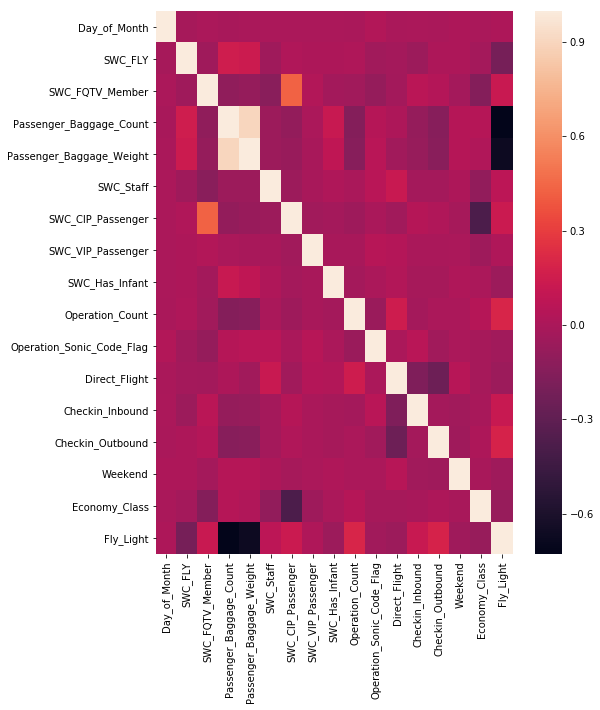

In [195]:
import seaborn as sns
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Visualization

Curious behavior of the operation count:
Below we see the *Operation Count* distribution. It is positive skewed. A high majority of the passengers does 1 operation, the population is localized under 20 operations. There is an outlier with 129 operations.

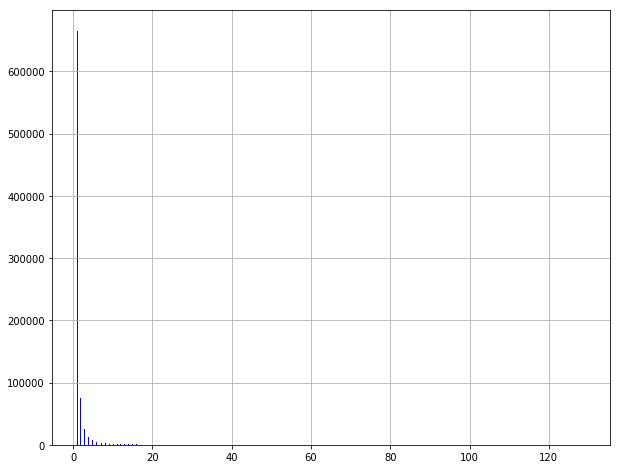

In [196]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1,figsize=(10, 8))
train_df["Operation_Count"].hist(bins=500, color="blue", ax=ax)


Operation count distributed uniformly over days of the week. Fridays are slightly a little busier than the others (?).

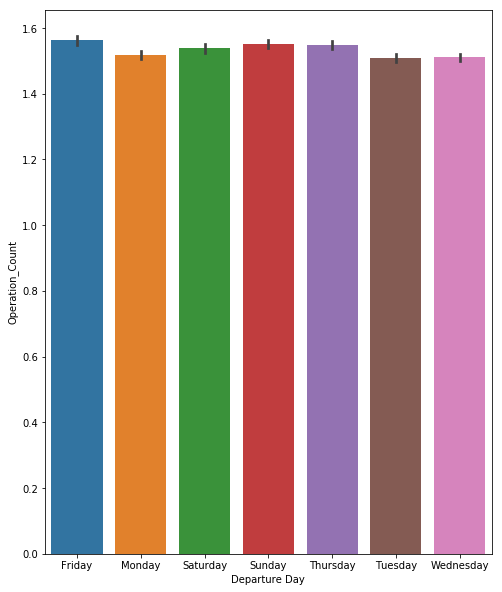

In [197]:
import seaborn as sns
sns.barplot(x='Departure Day',y='Operation_Count',data=train_df)

Uniform distribution in the operation count among weekend flag. So, there is no difference in number of operations during weekdays and the weekends.

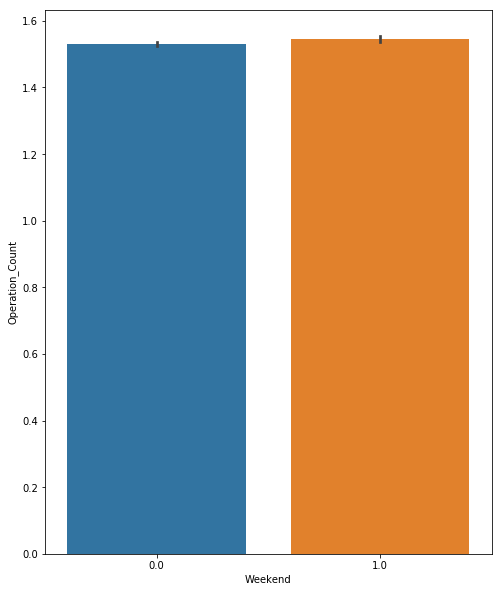

In [198]:
sns.barplot(x='Weekend',y='Operation_Count',data=train_df)

Direct flight seems to be an importan predictor of the operation count.

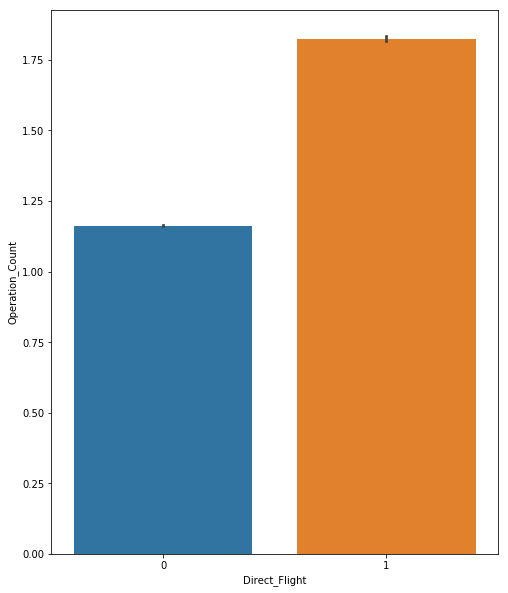

In [199]:
sns.barplot(x='Direct_Flight',y='Operation_Count',data=train_df)

Passenger_Baggage_Count

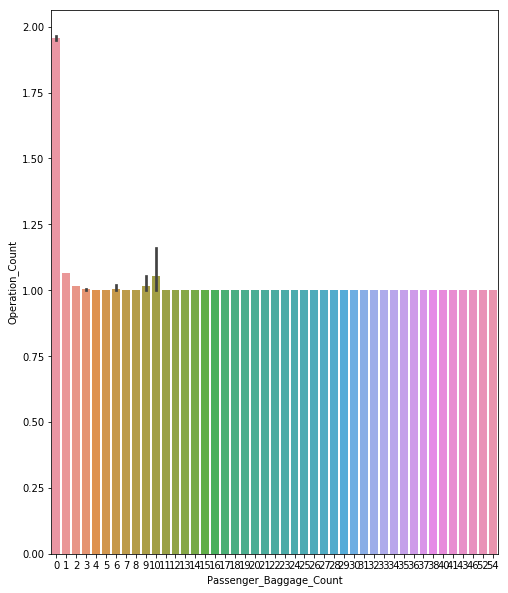

In [200]:
sns.barplot(x='Passenger_Baggage_Count',y='Operation_Count',data=train_df)

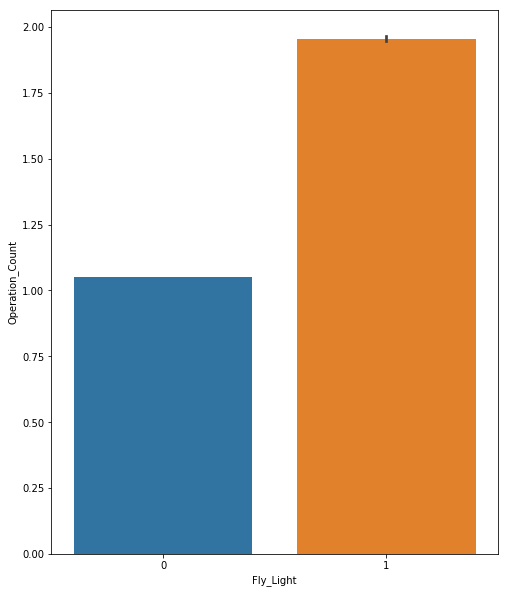

In [201]:
sns.barplot(x='Fly_Light',y='Operation_Count',data=train_df)

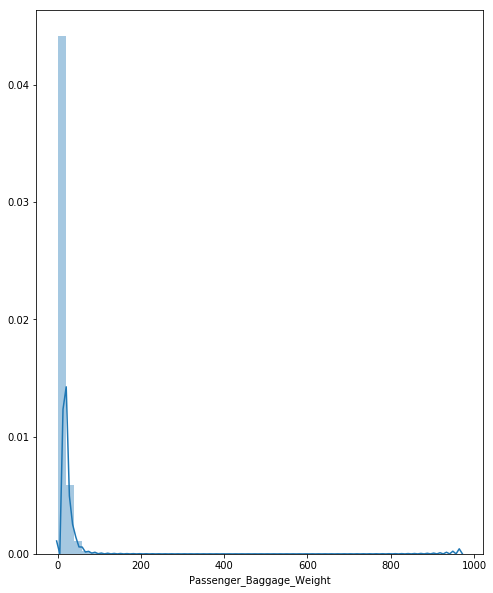

In [202]:
sns.distplot(train_df['Passenger_Baggage_Weight'])

## Feature Importance

Since no strong correlation with the target is found within the data, an automatic feature selection method is employed. Light GBM, is a greadient boosted tree based algorithm. Differing from other three based algorithms, it grows the trees vertically, i.e. it chooses the leaf with maximum loss and grows the tree from there. Details of this algorithm can be found in references.



Important Features:
---

+ Day_of_Month
+	SWC_FQTV_Member
+	Passenger_Baggage_Count
+	Direct_Flight
+	Early_Check_In_Status_Early
+	Economy_Class
+	SWC_CIP_Passenger
+	Terminal_Number_?
+	Passenger_Gender_M
+	Operation_Initials_Reduced_MK
+	Operation_Channel_TS

In [203]:
import lightgbm as lgb

#train_onehot = train_onehot.drop(columns = ["Departure_YMD_LMT", "Operation_YMD_LMT", "Operation_Initials", "Operation_Airport"], axis =1)
target = train_onehot["Operation_Count"]
train = train_onehot.drop(["Operation_Count"], axis = 1)
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(train, target)
gbm.booster_.feature_importance()
""
# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':train.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
0,Day_of_Month,373
2,SWC_FQTV_Member,202
3,Passenger_Baggage_Count,170
10,Direct_Flight,158
50,Early_Check_In_Status_Early,126
14,Economy_Class,116
6,SWC_CIP_Passenger,114
16,Terminal_Number_?,111
43,Passenger_Gender_M,100
61,Operation_Initials_Reduced_MK,95


## Train/Validation/Test Split

In [204]:
from sklearn.model_selection import train_test_split
# define target
y = train_onehot.Operation_Count
# define features
X = train_onehot.drop(columns = ["Operation_Count"])
# stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # stratify=X_train.Operation_Channel_Group, 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Labels Shape:', y_val.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (517564, 80)
Training Labels Shape: (517564,)
Validation Features Shape: (129392, 80)
Validation Labels Shape: (129392,)
Testing Features Shape: (161740, 80)
Testing Labels Shape: (161740,)


## Feature Normalization

Not needed for DT based algorithms

## Model Building

### Baseline Model: Random Forest

We first used all the features avaible.

### MP Model:

We see that y values are dominated by '1's. Our first aim is to classify the y values as '1's and 'others'.  Then we will use linear regression to find a relation among 'others'.


#### Training and Validation of the model

**PART 1: Classification**

The values that are different than '1' are set to zero 



In [0]:
y_train_log = np.where(y_train == 1, 1, 0)
y_val_log = np.where(y_val == 1, 1, 0)
y_test_log = np.where(y_test == 1, 1, 0)

Logistic Regression is employed:

In [206]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train_log)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

*Validation for Part 1:*

A new column is created to encode the first prediction for validation data. 

In [0]:
X_val['Prediction1'] = logreg.predict(X_val)
y_val_log_pred=X_val['Prediction1']

 **PART 2 : LINEAR REGRESSION**

In this part, we will train the data set corresponding to y values different than 1.







In [0]:
X_train_multi = X_train[y_train_log == 0]
y_train_multi = y_train[y_train_log == 0]

X_val_multi = X_val[y_val_log_pred == 0]
y_val_multi = y_val[y_val_log_pred == 0]

Lasso regression is used

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X_train_multi, y_train_multi)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


#regressor = LinearRegression()  
#regressor.fit(X_train_multi, y_train_multi) #training the algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.002810
Best score using built-in LassoCV: -0.407558


In [210]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 40 variables and eliminated the other 40 variables


Feature importance:

Text(0.5, 1.0, 'Feature importance using Lasso Model')

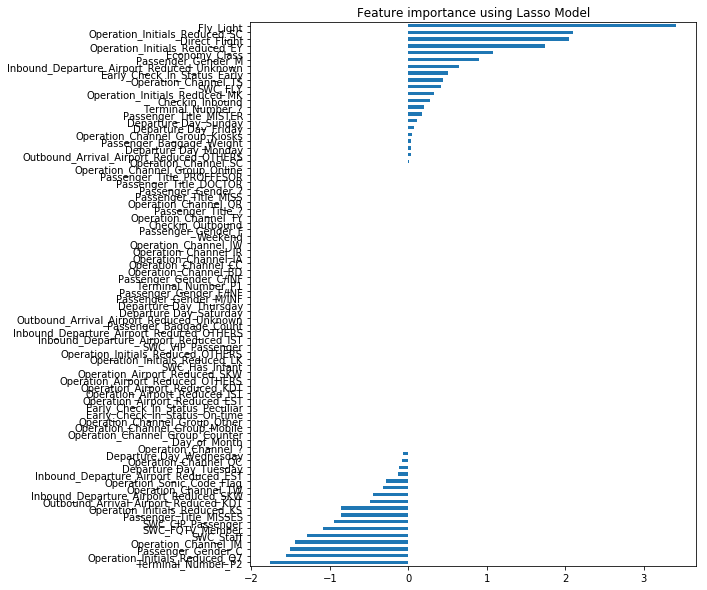

In [211]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Columns are chosen according to above Lasso model

In [0]:
cols = ['Fly_Light', 'Operation_Initials_Reduced_SC', 'Direct_Flight', 'Operation_Initials_Reduced_EY', 'Economy_Class', 'Passenger_Gender_M', 
        'Inbound_Departure_Airport_Reduced_Unknown', 'Early_Check_In_Status_Early', 'Operation_Channel_TS', 'SWC_FLY']

In [0]:
X_train_multi = X_train_multi[cols]
X_val_multi = X_val[cols]

Chosen columns are used in linear regression:

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train_multi, y_train_multi) #training the algorithm

X_val['Prediction2'] = regressor.predict(X_val_multi)

In [0]:
X_val['Prediction2'] = X_val['Prediction2'].round()
y_val_multi_pred= X_val['Prediction2']

Data type is changed to integer:

In [0]:
X_val['Prediction2'] = X_val['Prediction2'].astype('int64')

Final prediction combining the previus results are encoded in a third column called Prediction_fin

In [0]:
X_val['Prediction_fin'] = np.where((X_val.Prediction1 == 1), 1, X_val.Prediction2)

In [0]:
X_val['Prediction_fin'] = X_val['Prediction_fin'].astype('int64')

Accuracy check:

In [219]:
from sklearn.metrics import accuracy_score

score = accuracy_score(X_val['Prediction_fin'], y_val)
score


0.796123407938667

Error etc.

In [220]:
# Calculate the absolute errors
errors = abs(X_val['Prediction_fin'] - y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.57 degrees.
Accuracy: 74.9 %.


## Test and Evaluation



Applying same staps on the test data

In [222]:
X_test['Prediction1'] = logreg.predict(X_test)
y_test_log_pred=X_test['Prediction1']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_test_multi = X_test[cols]

In [232]:
X_test['Prediction2'] = regressor.predict(X_test_multi)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
X_test['Prediction2'] = X_test['Prediction2'].round()
y_test_multi_pred= X_test['Prediction2']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
X_test['Prediction2'] = X_test['Prediction2'].astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
X_test['Prediction_finito'] = np.where((X_test.Prediction1 == 1), 1, X_test.Prediction2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [236]:
X_test['Prediction_finito'] = X_test['Prediction_finito'].astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
# Calculate the absolute errors
errors = abs(X_test['Prediction_finito'] - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.58 degrees.
Accuracy: 74.35 %.


## Prediction

on result_df

In [0]:
result_df = result_df.drop(columns = ["Departure_YMD_LMT", 
                                    "Operation_YMD_LMT", 
                                    "Operation_Initials", 
                                    "Operation_Airport",
                                    "Inbound_Departure_Airport",
                                    "Outbound_Arrival_Airport",
                                    "Terminal_Name",
                                    "Early_Check_In",
                                       "Operation_Count"], axis =1)

In [239]:
result_onehot = result_df.copy()
for cols in result_df.columns: #leave as train_df!!!
  if result_onehot[cols].dtype.name == 'category':
    print(cols)
    one_hot = pd.get_dummies(train_df[cols], prefix = cols)
    result_onehot = result_onehot.drop(cols,axis = 1)
    result_onehot = result_onehot.join(one_hot)


Terminal_Number
Operation_Channel
Passenger_Title
Passenger_Gender
Operation_Channel_Group
Early_Check_In_Status
Operation_Airport_Reduced
Operation_Initials_Reduced
Inbound_Departure_Airport_Reduced
Outbound_Arrival_Airport_Reduced
Departure Day


In [0]:
result_onehot['Prediction1'] = logreg.predict(result_onehot)


In [0]:
result_onehot_multi = result_onehot[cols]

In [250]:
result_onehot['Prediction2'] = regressor.predict(result_onehot_multi)

ValueError: ignored

## Submission

## References


1.   [Impute Missing Values](https://jamesrledoux.com/code/imputation)
2.   [Is it better to drop or impute values from data sets when applying ML, or would it be better to label them as 'missing' for categorical variables?](https://www.quora.com/Is-it-better-to-drop-or-impute-values-from-data-sets-when-applying-ML-or-would-it-be-better-to-label-them-as-missing-for-categorical-variables)

